#importing and describe the data🔍

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('/content/Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


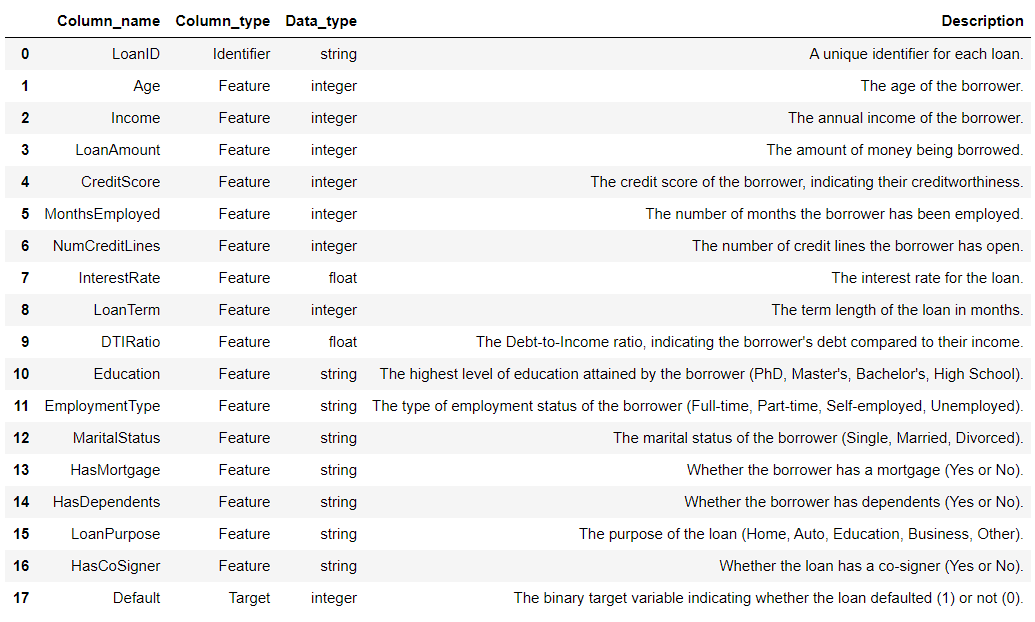

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


that is very normal and logical data

<Axes: >

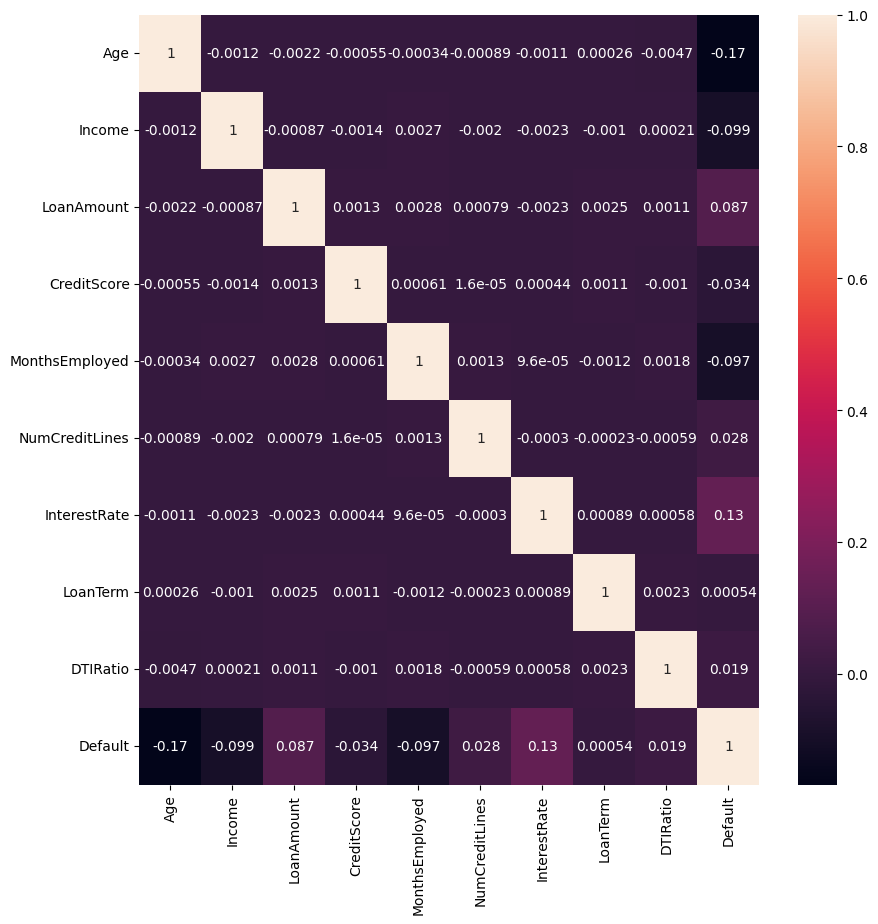

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)

from the heat map we see that-> the corr bet the data is low and the most feature is age

**after understanding the data we will clean this data (if we need)**

#cleaning🧹

In [14]:
df=df.iloc[:,1:18] # removing the ID it is must ignor it , because it is not effective for define the default
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [15]:
df.duplicated().sum()

np.int64(0)

**✅so,we don't have any duplicated**

In [16]:
df.isnull().sum()

,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0
Education,0


**✅and don't have any nulls**

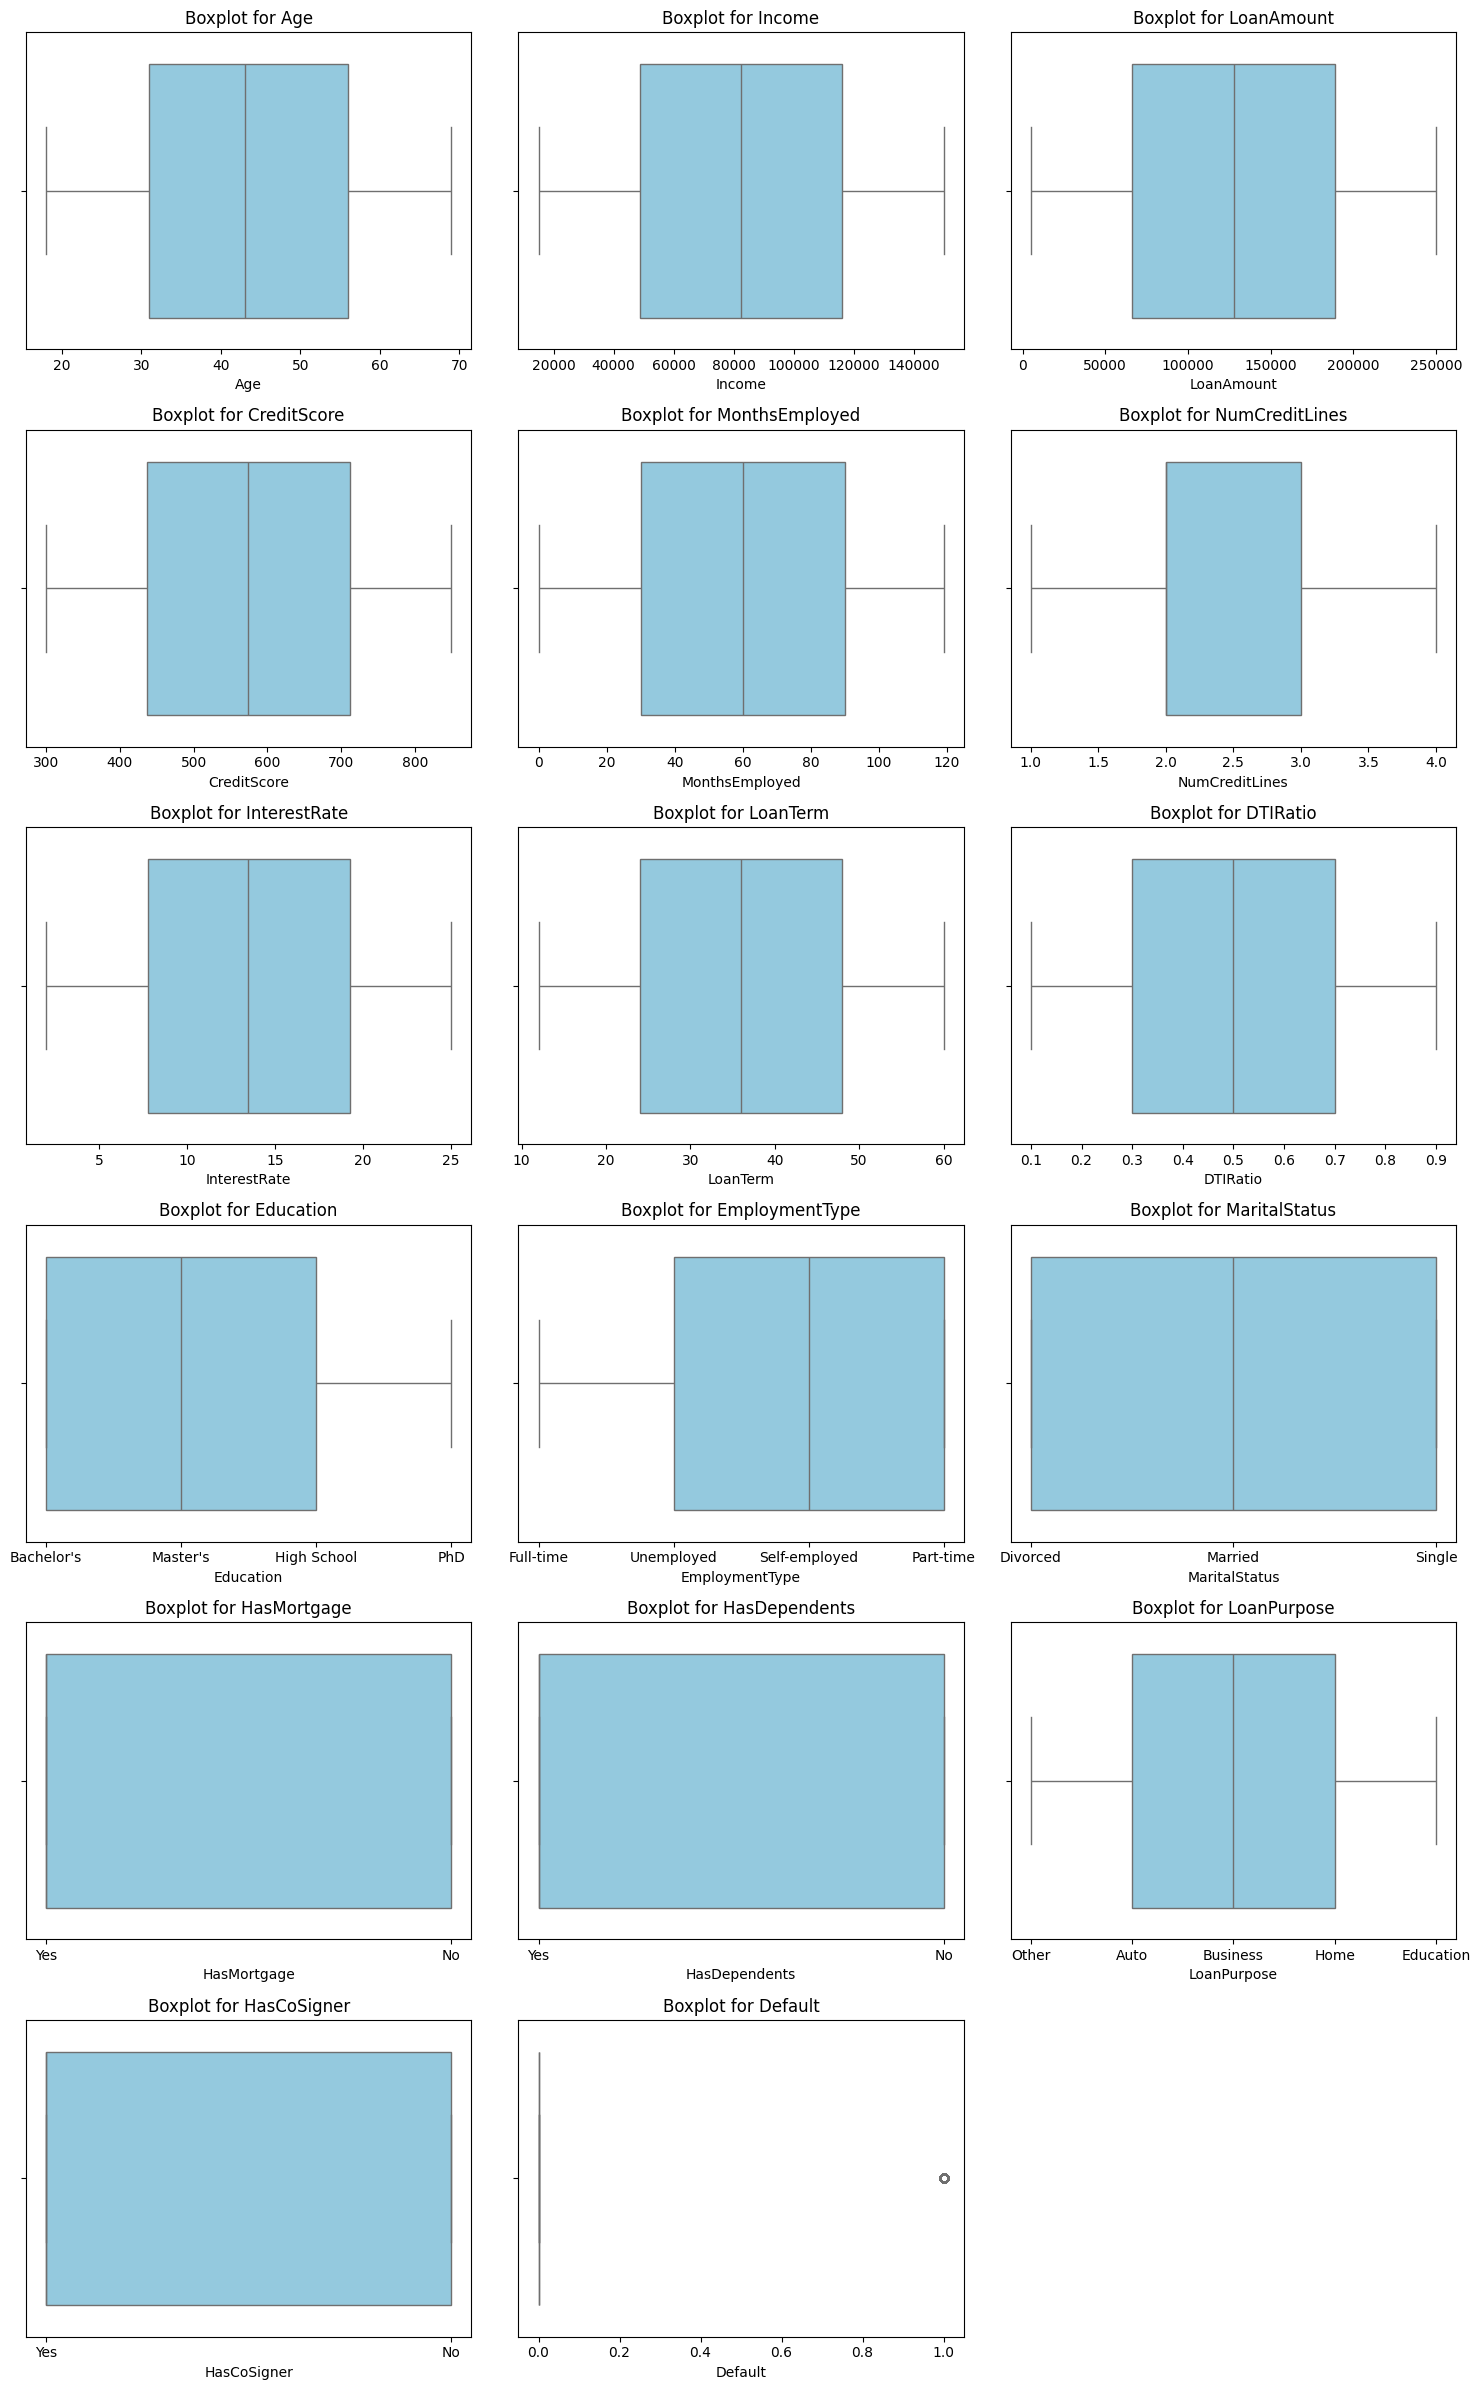

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols = df.columns
n = len(cols)

cols_per_row = 3
rows = math.ceil(n / cols_per_row)


fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel(col)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**✅and also we dont't have outliers**

#Encoding🔢

In [18]:
df['Education'].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [19]:
maping_of_education={'High School':0,"Bachelor's":1,"Master's":2,'PhD':3}
df['Education']=df['Education'].map(maping_of_education)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,Unemployed,Divorced,No,Yes,Auto,No,0


we assume that the order of education are important

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['HasMortgage']=le.fit_transform(df['HasMortgage'])
df['HasCoSigner']=le.fit_transform(df['HasCoSigner'])
df['HasDependents']=le.fit_transform(df['HasDependents'])
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,Full-time,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,Full-time,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,Unemployed,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,Full-time,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,Unemployed,Divorced,0,1,Auto,0,0


that must be encode with one hot

In [21]:
df['EmploymentType'].unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [22]:
maping_of_employment_type={'Unemployed':0,'Self-employed':1,'Part-time':2,'Full-time':3}
df['EmploymentType']=df['EmploymentType'].map(maping_of_employment_type)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,3,Divorced,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,3,Married,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,0,Divorced,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,3,Married,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,0,Divorced,0,1,Auto,0,0


we assume that ordared of employment type also (by this way) , but we can ignore this ordred and we also can encode with get dummies binary but we don't to increase the dimentions

In [23]:
df['MaritalStatus'].unique()

array(['Divorced', 'Married', 'Single'], dtype=object)

In [24]:
maping_of_MaritalStatus={'Divorced':0,'Married':1,'Single':2}
df['MaritalStatus']=df['MaritalStatus'].map(maping_of_MaritalStatus)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,3,0,1,1,Other,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,3,1,0,0,Other,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,0,0,1,1,Auto,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,3,1,0,0,Business,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,0,0,0,1,Auto,0,0


here is the same concept of employment type

In [25]:
enconde_loan_purpose=pd.get_dummies(df['LoanPurpose'],drop_first=True,dtype=int)
df=pd.concat([df,enconde_loan_purpose],axis=1)
df.drop('LoanPurpose',axis=1,inplace=True)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,HasCoSigner,Default,Business,Education,Home,Other
0,56,85994,50587,520,80,4,15.23,36,0.44,1,3,0,1,1,1,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,3,1,0,0,1,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,0,0,1,1,0,1,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,3,1,0,0,0,0,1,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,0,0,0,1,0,0,0,0,0,0


here we encode by get dummies because the loan purpose has many cases and we don't need to set normal numbers to avoid that the big number will attention the model and ignore the small number

<Axes: >

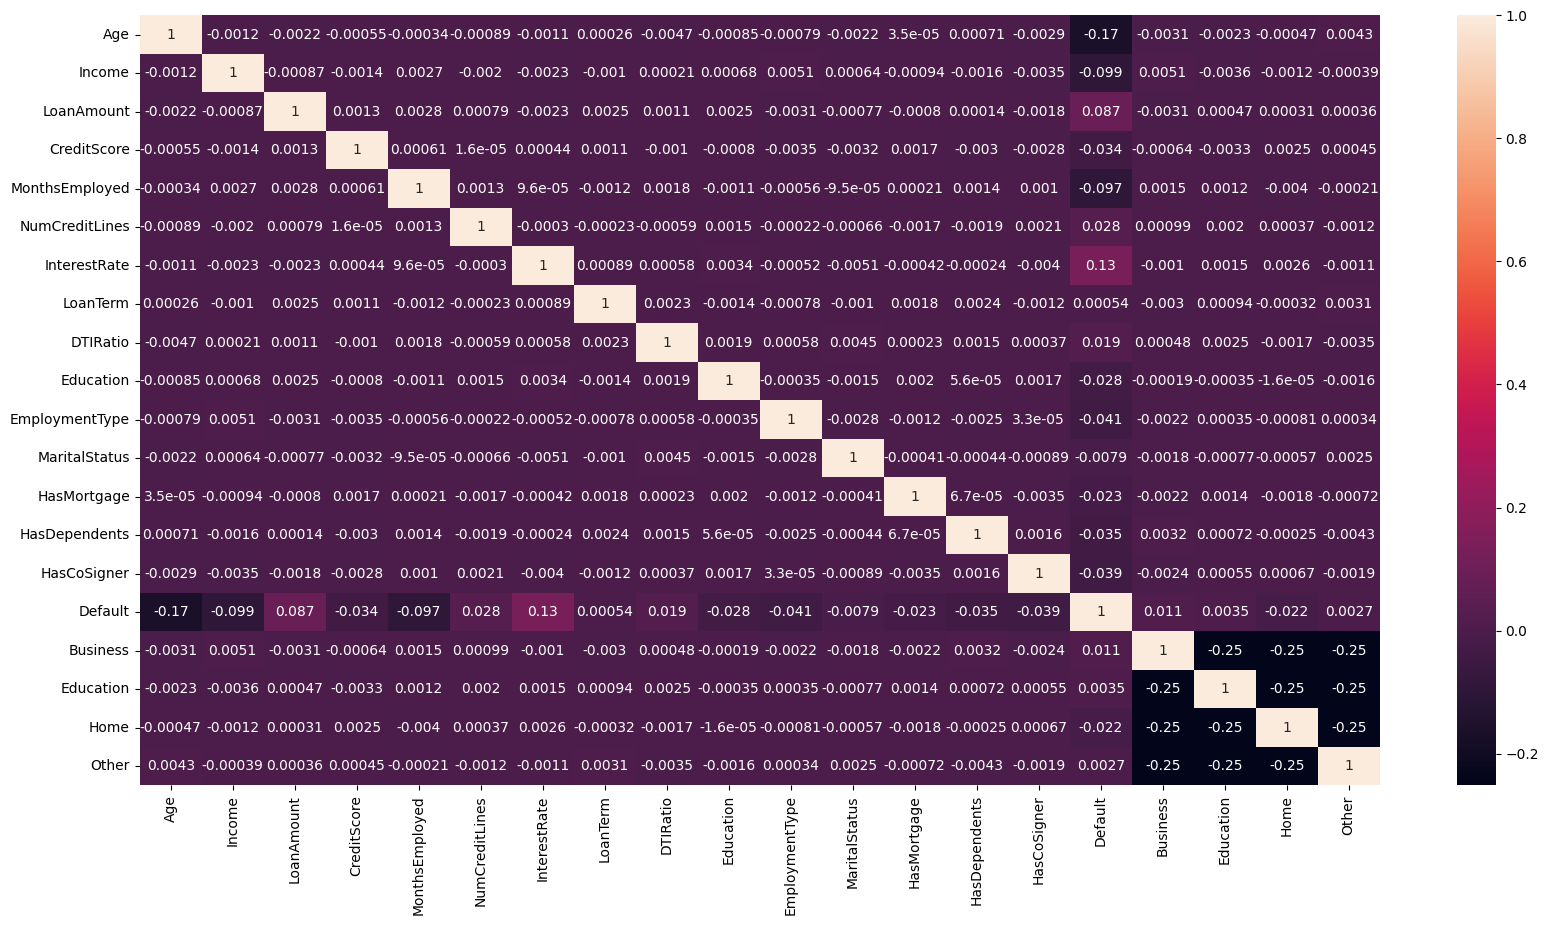

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

heat map after encoding

#Cheack the Imbalancing⚖️


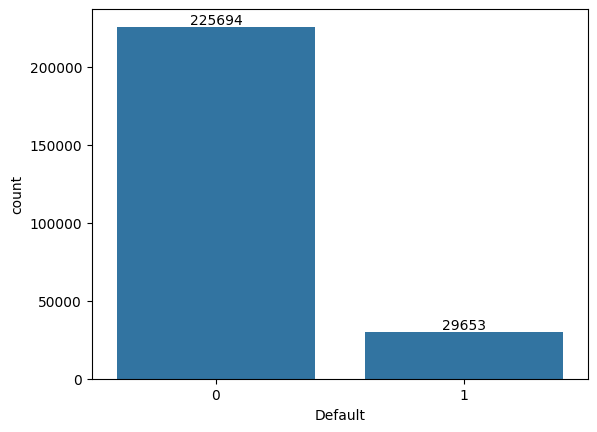

In [27]:
ax=sns.countplot(df,x='Default')
for container in ax.containers:
    ax.bar_label(container)

**⚠️we have very very imbalanced data in our target we shoud to handel it later**

#Spliting

In [28]:
from sklearn.model_selection import train_test_split
x=df.drop('Default',axis=1)
y=df['Default']

#Handling the imbalance data🛠️

In [29]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_resampled, y_resampled = smk.fit_resample(x, y)

we have many ways to handel this case (over or under) , but in my opinion it is good to use marge of libraries like SMOTETOMEK or SMOTETEEN thay are powerfull

In [30]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 209553, 1: 209553})


**✅and now the data is balanced**

#Scaling📏

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**✅StandardScaler is good and enough for many models if we will need it**

#Feature Selection🔬

In [32]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

**✅ we use PCA because we have many of dimantions in our data and it good for handling that**

#Modiling🧠

In [33]:
!pip install xgboost
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [ ]:
x_train_sample, _, y_train_sample, _ = train_test_split(x_train_pca, y_train, test_size=0.85, random_state=42)


**we make sample of our data to pass to grid search because the data is very big and it will take large of time**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = {
    'max_depth': [ 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
rf = RandomForestClassifier(n_estimators=200,random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=1, verbose=2)
grid_rf.fit(x_train_sample, y_train_sample)

print("Best params:", grid_rf.best_params_)
print("CV accuracy:", grid_rf.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=  31.9s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=  31.8s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=  32.1s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=  32.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=  31.7s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=  32.2s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=  31.5s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=  

**✅we done the gride search for some of hyp and that return the best hyp for me (here also we have a lot of options to improve it but it may takes more time)**

In [34]:
rf_model = RandomForestClassifier(n_estimators=200,random_state=42,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',criterion='entropy',max_depth=20)
rf_model.fit(x_train_pca, y_train)
y_pred = rf_model.predict(x_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8625778435255661


**✅we get the final result of RF and get (86.2) and it is not bad for this corr of data and also we can try a lot of models for classfication**

In [35]:
print("classification_report: \n",classification_report(y_test, y_pred))

classification_report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87     42031
           1       0.88      0.84      0.86     41791

    accuracy                           0.86     83822
   macro avg       0.86      0.86      0.86     83822
weighted avg       0.86      0.86      0.86     83822



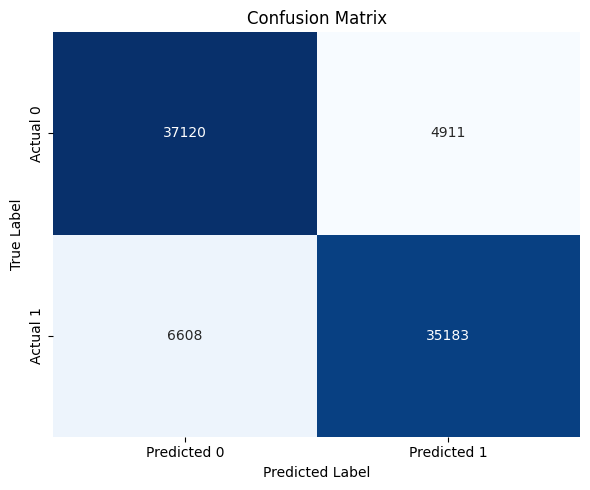

In [36]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [ ]:
base_models = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42))
]

meta_model = LogisticRegression(max_iter=1000)

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=True
)

param_grid = {
    'rf__max_depth': [5, 10],
    'xgb__max_depth': [3, 5],
    'xgb__learning_rate': [0.05, 0.1],
    'final_estimator__C': [0.1, 1]
}

grid = GridSearchCV(stacking_clf, param_grid, cv=3, n_jobs=-1)
grid.fit(x_train_sample, y_train_sample)
print("Best Params:", grid.best_params_)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:01:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:01:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:01:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params: {'final_estimator__C': 1, 'rf__max_depth': 10, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5}


**and also we can try to build stacking model because it is powerfull , and also implement the grid search for return the best hyp**

In [ ]:
from re import VERBOSE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200,random_state=42,min_samples_split=5,min_samples_leaf=1,max_features='log2',criterion='gini',max_depth=20)),
    ('xgb', XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5, random_state=42)),


]
meta_model = LogisticRegression(max_iter=1000,C=1)

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    verbose=1
)
stacking_clf.fit(x_train_pca, y_train)
y_pred = stacking_clf.predict(x_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 41.0min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.8s finished


Accuracy: 0.8629476748347689


**✅ done for this basic stacking and we can improve it later**

In [ ]:
print("classification_report:",classification_report(y_test, y_pred))
print("confusion_matrix:",confusion_matrix(y_test, y_pred))

classification_report:               precision    recall  f1-score   support

           0       0.85      0.88      0.87     42031
           1       0.88      0.84      0.86     41791

    accuracy                           0.86     83822
   macro avg       0.86      0.86      0.86     83822
weighted avg       0.86      0.86      0.86     83822

confusion_matrix: [[37025  5006]
 [ 6482 35309]]
